In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sgkit as sg

import sys
sys.path.append("../../tsimpute/src/")
import vis


In [2]:
# Genetic variation at shared sites
zarr_dir = "../data/zarr/"
ref_ds = sg.load_dataset(zarr_dir + "ref.zarr") # not all allele lists are ACGT
ref_ds_compat = sg.load_dataset(zarr_dir + "ref_compat.zarr")
target_ds_compat = sg.load_dataset(zarr_dir + "target_compat.zarr") # ground-truth
target_chip_ds_compat = sg.load_dataset(zarr_dir + "target_chip_compat.zarr")   # chip-like
lshmm_ds_compat = sg.load_dataset(zarr_dir + "target_lshmm_compat.zarr")    # imputed
beagle_ds_compat = sg.load_dataset(zarr_dir + "target_beagle_compat.zarr")  # imputed


In [3]:
print(f"Sites in ref (full): {ref_ds.dims['variants']}")
print(f"Sites in ref (shared): {ref_ds_compat.dims['variants']}")
print(f"Sites in target (shared): {target_ds_compat.dims['variants']}")
print(f"Sites in target chip (shared): {target_chip_ds_compat.dims['variants']}")
print(f"Sites in lshmm (shared): {lshmm_ds_compat.dims['variants']}")
print(f"Sites in BEAGLE (shared): {beagle_ds_compat.dims['variants']}")


Sites in ref (full): 504314
Sites in ref (shared): 231630
Sites in target (shared): 231630
Sites in target chip (shared): 7899
Sites in lshmm (shared): 504314
Sites in BEAGLE (shared): 504314


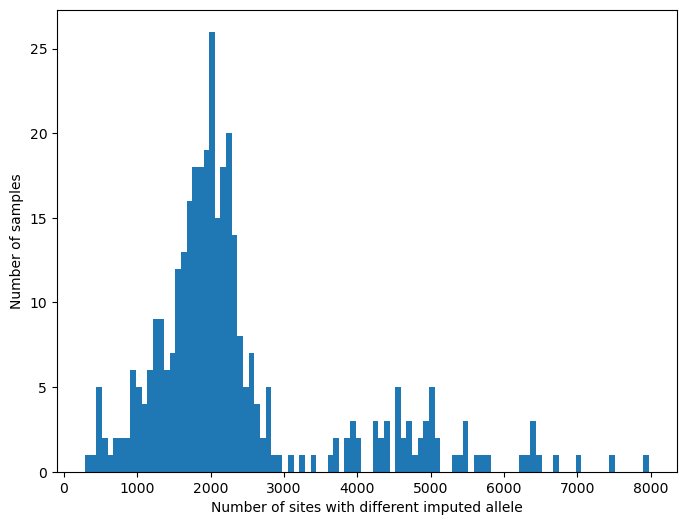

In [4]:
# lshmm vs. BEAGLE (all sites)
assert lshmm_ds_compat.dims["ploidy"] == 2

diff_lshmm_beagle = np.zeros(
    2 * lshmm_ds_compat.dims["samples"],
    dtype=np.int32
)

for i in np.arange(lshmm_ds_compat.dims["samples"]):
    diff_lshmm_beagle[2 * i] = np.sum(np.invert(np.equal(
        lshmm_ds_compat.call_genotype[:, i, 0].values,
        beagle_ds_compat.call_genotype[:, i, 0].values
    )))
    diff_lshmm_beagle[2 * i + 1] = np.sum(np.invert(np.equal(
        lshmm_ds_compat.call_genotype[:, i, 1].values,
        beagle_ds_compat.call_genotype[:, i, 1].values
    )))

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(diff_lshmm_beagle, bins=100);
ax.set_ylabel("Number of samples")
ax.set_xlabel("Number of sites with different imputed allele");


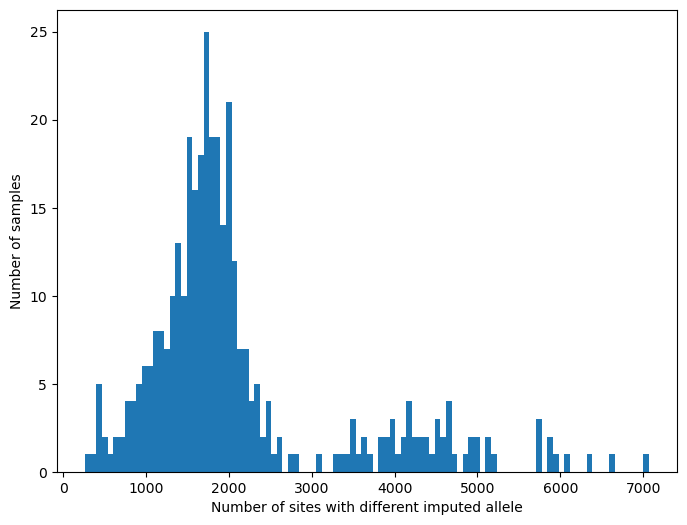

In [5]:
# lshmm vs. BEAGLE (biallelic sites in ref. and target)
shared_sites = np.where(np.isin(
    lshmm_ds_compat.variant_position.values,
    ref_ds_compat.variant_position.values
))[0]

lshmm_ds_compat_shared = lshmm_ds_compat.isel(variants=shared_sites)
beagle_ds_compat_shared = beagle_ds_compat.isel(variants=shared_sites)

assert lshmm_ds_compat_shared.dims["ploidy"] == 2
assert beagle_ds_compat_shared.dims["ploidy"] == 2

diff_lshmm_beagle = np.zeros(
    2 * lshmm_ds_compat_shared.dims["samples"],
    dtype=np.int32
)

for i in np.arange(lshmm_ds_compat_shared.dims["samples"]):
    diff_lshmm_beagle[2 * i] = np.sum(np.invert(np.equal(
        lshmm_ds_compat_shared.call_genotype[:, i, 0].values,
        beagle_ds_compat_shared.call_genotype[:, i, 0].values
    )))
    diff_lshmm_beagle[2 * i + 1] = np.sum(np.invert(np.equal(
        lshmm_ds_compat_shared.call_genotype[:, i, 1].values,
        beagle_ds_compat_shared.call_genotype[:, i, 1].values
    )))

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(diff_lshmm_beagle, bins=100);
ax.set_ylabel("Number of samples")
ax.set_xlabel("Number of sites with different imputed allele");


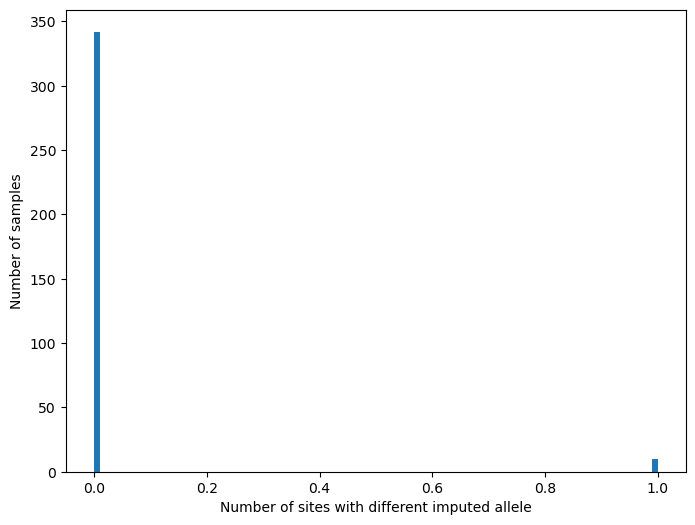

In [6]:
# BEAGLE vs. truth (biallelic sites in both ref. and target)
shared_sites = np.where(np.isin(
    beagle_ds_compat.variant_position.values,
    ref_ds_compat.variant_position.values
))[0]

beagle_ds_compat_shared = beagle_ds_compat.isel(variants=shared_sites)

assert beagle_ds_compat_shared.dims["ploidy"] == 2
assert target_ds_compat.dims["ploidy"] == 2

diff_beagle_truth = np.zeros(
    2 * beagle_ds_compat_shared.dims["samples"],
    dtype=np.int32
)

for i in np.arange(beagle_ds_compat_shared.dims["samples"]):
    diff_beagle_truth[2 * i] = np.sum(np.invert(np.equal(
        beagle_ds_compat_shared.call_genotype[:, i, 0].values,
        target_ds_compat.call_genotype[:, i, 0].values
    )))
    diff_beagle_truth[2 * i + 1] = np.sum(np.invert(np.equal(
        beagle_ds_compat_shared.call_genotype[:, i, 1].values,
        target_ds_compat.call_genotype[:, i, 1].values
    )))

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(diff_beagle_truth, bins=100)
ax.set_ylabel("Number of samples")
ax.set_xlabel("Number of sites with different imputed allele");
